# Human Protein Atlas - Single Cell Classification

## Find individual human cell differences in microscope images

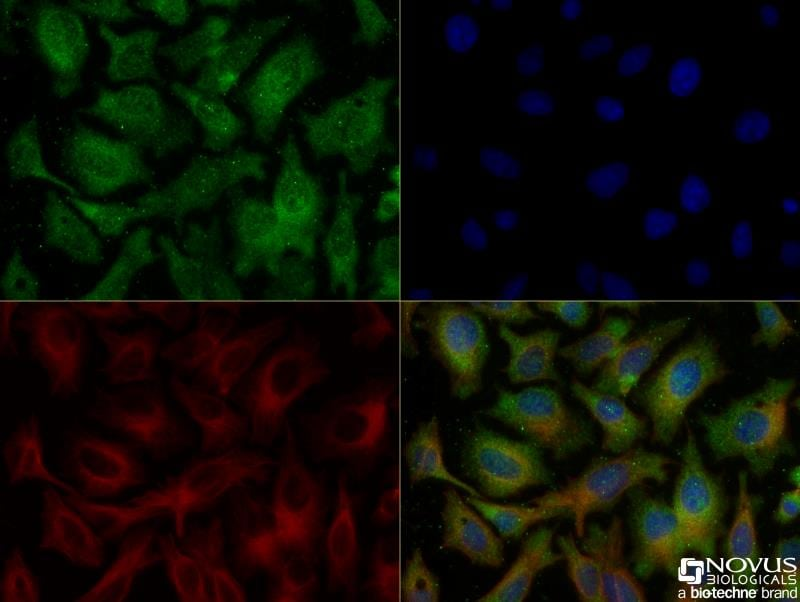



## Introduction

Datasets:
 [Human Protein Atlas - Single Cell Classification Dataset](https://www.kaggle.com/c/hpa-single-cell-image-classification/data).
 

Package documentation:

(1) [Keras DenseNet121](https://keras.io/api/applications/densenet).

(2) [Tensorflow Module: tf.keras.layers.experimental.preprocessing](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/).

(3) [Tensorflow Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation).

(4) [Tensorflow Image classification](https://www.tensorflow.org/tutorials/images/classification).

(5) [Tensorflow Image dataset from directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory).

(6) [scikit-learn MultiLabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html#sklearn.preprocessing.MultiLabelBinarizer).


## Table of Content:

1. Importing the Libraries


2. Importing the dataset.


3. Preprocessing:

    3.1 Get unique single-cell image identifiers and multilabels.
    
    3.2 Splitting the data into features and labels.
    
    3.3 Binarizing each label/class
    
    3.4 Creating a new column with unique identifiers for single-cell images
    
    3.5 Define multilabels for training
    

4. Train and validation split.
    
    4.1 Definining the constant parameters
    
    4.2 ImageDataGenerator.
    
    4.3 image_generator.flow_from_dataframe() train & Test set
        

5. Model definition.

    5.1 DenseNet121 model
    
    5.2 Data Argumentation
    
    5.3 Model Compling
    
    5.4 Model Summary
    
    5.5 Interpretation of output
    
    
6. Tuning/Trainable Parameters

    6.1 Epochs
    
    6.2 Callbacks
    
    6.3 Model fitting
    
    
7. Model Accuracy  and Loss Rate.

    
8. Result



## 1.Importing the required Libraries.


Glob: module provides a convenient way to search for files or directories that match a specified pattern according to the rules used by the Unix shell, although it works on any operating system.
eg:
    python_files = glob.glob('*.py')
    print(python_files)

Shutil:This module helps in automating the process of copying and removal of files and directories. Also, offers high-level operation on a file.

tqdm:progressbar decorator for iterators.

PIL:Python Imaging Library which provides the python interpreter with image editing capabilities.



In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import warnings 
import os,gc,cv2
import shutil
import random
from tqdm.notebook import tqdm
from PIL import Image, ImageDraw
from sklearn.preprocessing import MultiLabelBinarizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop


%matplotlib inline
warnings.filterwarnings('ignore')

## 2. Importing the data from directories.

In [2]:
# directories 
CELL_IMG='../input/hpa-cell-tiles-sample-balanced-dataset/cells/'
CELL_DF='../input/hpa-cell-tiles-sample-balanced-dataset/cell_df.csv'

## 3. Pre-processing

### (3.1) Get unique single-cell image identifiers and multilabels

In [3]:
# loads train dataframe
train_df=pd.read_csv(CELL_DF)
train_df.head(n=10)

,image_id,r_mean,g_mean,b_mean,cell_id,image_labels,size1,size2
0,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0.019785,0.007022,0.081189,1,0,510,656
1,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0.021645,0.011319,0.059531,2,0,875,748
2,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0.026710,0.014573,0.054268,3,0,924,760
3,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0.018123,0.009205,0.065854,4,0,844,538
4,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0.029577,0.014019,0.037737,5,0,620,1168
5,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0.040529,0.008827,0.062398,6,0,472,476
6,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0.061733,0.026504,0.071511,7,0,428,555
7,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0.040644,0.010379,0.047766,8,0,578,640
8,6166673c-bbad-11e8-b2ba-ac1f6b6435d0,0.074895,0.037825,0.112530,1,0,270,313
9,6166673c-bbad-11e8-b2ba-ac1f6b6435d0,0.036115,0.012050,0.106811,2,0,408,208


### (3.2) Splitting the data into features and labels.

In [4]:

# spliting label column
train_df["image_labels"] = train_df["image_labels"].str.split("|")

# class labels
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']



  0%|          | 0/19 [00:00<?, ?it/s]

### (3.3) Binarizing each label/class

In [ ]:

for label in tqdm(class_labels):
    train_df[label] = train_df['image_labels'].map(lambda result: 1 if label in result else 0)

# rename column
train_df.columns = ['image_id', 'r_mean', 'g_mean', 'b_mean', 'cell_id', 'image_labels', 'size1', 'size2', 'Nucleoplasm', 'Nuclear membrane', 'Nucleoli', 'Nucleoli fibrillar center',
                    'Nuclear speckles', 'Nuclear bodies', 'Endoplasmic reticulum', 'Golgi apparatus', 'Intermediate filaments',
                    'Actin filaments', 'Microtubules', 'Mitotic spindle', 'Centrosome', 'Plasma membrane', 'Mitochondria',
                    'Aggresome', 'Cytosol', 'Vesicles and punctate cytosolic patterns', 'Negative']

In [5]:
train_df.head()

,image_id,r_mean,g_mean,b_mean,cell_id,image_labels,size1,size2,Nucleoplasm,Nuclear membrane,...,Actin filaments,Microtubules,Mitotic spindle,Centrosome,Plasma membrane,Mitochondria,Aggresome,Cytosol,Vesicles and punctate cytosolic patterns,Negative
0,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0.019785,0.007022,0.081189,1,[0],510,656,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0.021645,0.011319,0.059531,2,[0],875,748,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0.026710,0.014573,0.054268,3,[0],924,760,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0.018123,0.009205,0.065854,4,[0],844,538,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0.029577,0.014019,0.037737,5,[0],620,1168,1,0,...,0,0,0,0,0,0,0,0,0,0


### (3.4) Creating a new column with unique identifiers for single-cell images

In [6]:


multinames = ['id', 'r_mean', 'g_mean', 'b_mean', 'image_labels', 'size1', 'size2', 'Nucleoplasm', 'Nuclear membrane', 'Nucleoli', 'Nucleoli fibrillar center',
                    'Nuclear speckles', 'Nuclear bodies', 'Endoplasmic reticulum', 'Golgi apparatus', 'Intermediate filaments',
                    'Actin filaments', 'Microtubules', 'Mitotic spindle', 'Centrosome', 'Plasma membrane', 'Mitochondria',
                    'Aggresome', 'Cytosol', 'Vesicles and punctate cytosolic patterns', 'Negative']
cell_df=train_df
cell_df["id"] = cell_df['image_id'] +'_'+ cell_df['cell_id'].astype(str) 
cell_df["id"] =  cell_df["id"] + '.jpg'
cell_df=cell_df.drop( columns=['image_id', 'cell_id'] )
cell_df=cell_df.reindex( columns= multinames ) 
cell_df.head()

,id,r_mean,g_mean,b_mean,image_labels,size1,size2,Nucleoplasm,Nuclear membrane,Nucleoli,...,Actin filaments,Microtubules,Mitotic spindle,Centrosome,Plasma membrane,Mitochondria,Aggresome,Cytosol,Vesicles and punctate cytosolic patterns,Negative
0,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0_1.jpg,0.019785,0.007022,0.081189,[0],510,656,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0_2.jpg,0.021645,0.011319,0.059531,[0],875,748,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0_3.jpg,0.026710,0.014573,0.054268,[0],924,760,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0_4.jpg,0.018123,0.009205,0.065854,[0],844,538,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0_5.jpg,0.029577,0.014019,0.037737,[0],620,1168,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# change order of ids as in the cells folder
cell_df=cell_df.sort_values('id', axis=0, ascending=True, inplace=False, 
                            kind='quicksort', na_position='last')
cell_df.head()

,id,r_mean,g_mean,b_mean,image_labels,size1,size2,Nucleoplasm,Nuclear membrane,Nucleoli,...,Actin filaments,Microtubules,Mitotic spindle,Centrosome,Plasma membrane,Mitochondria,Aggresome,Cytosol,Vesicles and punctate cytosolic patterns,Negative
9889,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_1.jpg,0.029838,0.049161,0.059588,"[7, 1, 2, 0]",138,480,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9898,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_10.jpg,0.043967,0.054613,0.060938,"[7, 1, 2, 0]",432,342,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9899,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_11.jpg,0.040318,0.033774,0.052175,"[7, 1, 2, 0]",336,508,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9900,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_12.jpg,0.022636,0.028688,0.027753,"[7, 1, 2, 0]",520,654,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9901,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_13.jpg,0.056131,0.049325,0.075091,"[7, 1, 2, 0]",412,384,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### (3.5) Define multilabels for training

In [1]:

multilabels = ['Nucleoplasm', 'Nuclear membrane', 'Nucleoli', 'Nucleoli fibrillar center',
                    'Nuclear speckles', 'Nuclear bodies', 'Endoplasmic reticulum', 'Golgi apparatus', 'Intermediate filaments',
                    'Actin filaments', 'Microtubules', 'Mitotic spindle', 'Centrosome', 'Plasma membrane', 'Mitochondria',
                    'Aggresome', 'Cytosol', 'Vesicles and punctate cytosolic patterns', 'Negative']
print( len(multilabels), '\n')

19 



## 4.Train and validation split

Use the tensorflow method 'flow_from_dataframe', as in this [notebook](https://www.kaggle.com/minniekabra/code-3may) 

### 4.1 Definining the constant parameters

In [9]:
# constant parameters
IMG_SIZE = 224
BATCH_SIZE = 32

### 4.2 ImageDataGenerator.

1. rescale: This argument rescales the pixel values of the input images. In this case, the rescale value of 1./255 means that each pixel value will be divided by 255, so that all pixel values are in the range [0, 1]. This is a common preprocessing step for image data.

2. data_format: This argument specifies the order of the dimensions in the input data. In this case, channels_last means that the input data is expected to have shape (batch_size, height, width, channels), where channels is the number of color channels in the image (e.g., 3 for RGB images).

3. preprocessing_function: allows you to specify a function that will be applied to each image before it is fed into the model. 

4. validation_split: specifies the fraction of the input data that should be used for validation. In this case, 0.2 means that 20% of the input data will be used for validation, and the remaining 80% will be used for training.


In [10]:
# image generator, rescaling is performed in a pre-processing layer below, 
image_generator = image.ImageDataGenerator(
    rescale=1./255,
    data_format='channels_last',
    preprocessing_function=None,
    validation_split=0.2
)

### 4.3 image_generator.flow_from_dataframe() training set

flow_from_dataframe method of the image_generator object allows you to generate batches of images and labels from a Pandas DataFrame, rather than directly from a directory on disk.

#### The arguments used :
1. cell_df: This is the Pandas dataframe that contains the filenames and labels of the images in the dataset.

2. class_mode: This argument specifies the type of labels that are being used. In this case, class_mode='raw' indicates that the labels are provided as an array of shape (batch_size, num_classes).

3. color_mode: This argument specifies the color mode of the input images. 'rgb' indicates that the images are in color and have three channels (red, green, and blue).

4. target_size: This argument specifies the size to which the input images will be resized. In this case, (IMG_SIZE, IMG_SIZE) indicates that the images will be resized to have a height and width of IMG_SIZE pixels.

5. batch_size: This argument specifies the number of images that should be included in each batch.

6. seed: This argument sets the random seed for data augmentation, which ensures that the same transformations are applied to each image in each epoch.

7. subset: This argument specifies whether to use the 'training' or 'validation' subset of the data.

In [11]:
# train set data flow from dataframe
train_data = image_generator.flow_from_dataframe(
cell_df,  #a
directory=CELL_IMG,
x_col='id',
y_col=multilabels,
class_mode='raw',    
color_mode='rgb',
target_size=(IMG_SIZE, IMG_SIZE),    
batch_size=BATCH_SIZE,
seed=123,
subset='training'
)

Found 139231 validated image filenames.


### Testing  set

In [12]:
# validation set data flow from dataframe
validation_data = image_generator.flow_from_dataframe(
cell_df,
directory=CELL_IMG,
x_col='id',
y_col=multilabels,
class_mode='raw',    
color_mode='rgb',
target_size=(IMG_SIZE, IMG_SIZE),    
batch_size=BATCH_SIZE,
seed=123,
subset='validation'
)

Found 34807 validated image filenames.


## 5. Model definition

In [13]:
# constant parameters for model definition
NUM_CLASSES=19

### 5.1 DenseNet121 model

DenseNet121 has 121 layers and consists of a series of dense blocks, which are groups of layers that are densely connected to each other. In a dense block, each layer receives inputs from all previous layers in the block, and its outputs are concatenated with the inputs to the next layer. 

This dense connectivity allows gradients to flow more easily through the network and enables the model to learn more efficient representations of the data.


The output of the last dense block is passed through a global average pooling layer, which computes the average of each feature map across all spatial locations, resulting in a fixed-length feature vector. 

Finally, the feature vector is passed through a fully connected layer with a softmax activation function, which produces the model's predictions.

In [14]:
# DenseNet121 model
densenet = DenseNet121(
    include_top=True,
    weights=None,
    input_shape=(IMG_SIZE,IMG_SIZE,3),
    input_tensor=None,
    pooling=None,
    classes=NUM_CLASSES
)

### 5.2  Data Argumentation

In [19]:
# model definition including a normalization layer and extra layers
model_densenet = Sequential( [
layers.experimental.preprocessing.Rescaling( 1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3) ),
layers.experimental.preprocessing.RandomFlip("horizontal"),
layers.experimental.preprocessing.RandomFlip("vertical"),
layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
layers.experimental.preprocessing.RandomRotation(factor=1.0),
layers.experimental.preprocessing.RandomZoom(height_factor=0.25, width_factor=0.25),
densenet
] )

In [20]:
# shape of the output ndarray 
model_densenet.output

<KerasTensor: shape=(None, 19) dtype=float32 (created by layer 'densenet121')>

### 5.3 Model Compling

The compile method configures the model for training by specifying the optimizer, loss function, and metrics to be used during training and evaluation.

1. Adam optimizer is an adaptive learning rate optimization algorithm that is well-suited for training deep neural networks.
2. binary_crossentropy loss function is commonly used for binary classification problems. 
3. categorical_accuracy metric is used to evaluate the model's performance during training and evaluation, which calculates the accuracy of the model's predictions for each class.
4. Learning rate determines how much the model weights are updated during each iteration of training.
     Too high a learning rate can cause the model to diverge or oscillate around the optimum, while too low a learning rate can cause the model to converge slowly. The learning rate can be tuned by adjusting the lr parameter in the optimizer.


In [21]:
# compile model
learning_rate = 1e-3
model_densenet.compile(optimizer=Adam(lr=learning_rate), 
                       loss='binary_crossentropy', metrics=['categorical_accuracy'])

### 5.4 Model Summary

The summary method provides a high-level overview of the model, including the names and shapes of the model's layers, the number of trainable and non-trainable parameters, and the total number of parameters in the model.

In [22]:
# model summary
model_densenet.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
random_flip_4 (RandomFlip)   (None, 224, 224, 3)       0         
_________________________________________________________________
random_flip_5 (RandomFlip)   (None, 224, 224, 3)       0         
_________________________________________________________________
random_translation_2 (Random (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation_2 (RandomRot (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom_2 (RandomZoom)   (None, 224, 224, 3)       0         
_________________________________________________________________
densenet121 (Functional)     (None, 19)               

### 5.5 Interpretation of output:

This output shows that the model has an input layer with shape (None, 224, 224, 3) that takes 3-channel images with a height and width of 224 pixels. 

The model has a total of 121 layers, including convolutional layers, dense blocks, transition layers, and a global average pooling layer. 

The model has a total of 8,062,504 parameters, of which 7,978,856 are trainable and 83,648 are non-trainable. 

The output of the last layer is a fully connected layer with 1000 units, which corresponds to the number of classes in the pre-trained ImageNet dataset.


Table of Content:

1. Importing the Libraries

2. Importing the dataset.

3. Preprocessing:

    3.1  Get unique single-cell image identifiers and multilabels.
    3.2  Splitting the data into features and labels.
    3.3  Binarizing each label/class
    3.4  Creating a new column with unique identifiers for single-cell images
    3.5  Define multilabels for training

4. Train and validation split.
    4.1 Definining the constant parameters.
    4.2 ImageDataGenerator.

5. Model definition.

6. Result



## 6. Tuning/Trainable Parameters

Other tuning parameters are batch_size, Regulation(droupout)

(i) Batch size: The batch size determines how many samples are processed at once during each iteration of training. A larger batch size can lead to faster training, but may require more memory, while a smaller batch size may lead to slower training but better generalization. The batch size can be tuned by adjusting the batch_size parameter in the fit or fit_generator method.

(ii)  Regularization: Regularization techniques such as L1/L2 regularization or dropout can be used to prevent overfitting. The strength of the regularization can be tuned by adjusting the regularization parameter (l1 or l2) or the dropout rate.

### 6.1 Epochs

Epochs refer to the number of times the entire training dataset is passed through the model during training.

Setting the number of epochs is an important hyperparameter to tune during model training. Too few epochs can lead to underfitting, where the model has not learned the patterns in the data, while too many epochs can lead to overfitting, where the model has learned the noise in the data as well and performs poorly on new data.

The choice of the number of epochs depends on the size and complexity of the dataset, as well as the architecture and hyperparameters of the model.

In [ ]:
# constant training parameters
EPOCHS=10

### 6.2 Callbacks

Callbacks are functions, called at various points during the training process to perform actions such as saving the model's weights, logging performance metrics, or stopping the training early if the model's performance stops improving.

#### Arguments in callbacks:
1. EarlyStopping: This callback monitors the training loss and stops the training if the loss does not improve for a certain number of epochs (patience). Here the monitor is set to 'loss' and the patience is set to 2, which means that the training will be stopped if the loss does not improve for 2 consecutive epochs.

2. ModelCheckpoint: This callback saves the model's weights after each epoch if the validation loss has improved. The filepath argument specifies the location and format of the saved weights file. The format includes the epoch number and validation loss in the filename.

3. TensorBoard: This callback logs performance metrics during training and creates visualizations that can be viewed in the TensorBoard web interface. The log_dir argument specifies the directory where the log files will be saved.

In [24]:
# callbacks
model_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, verbose=0),
    tf.keras.callbacks.ModelCheckpoint(filepath='./densenet_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

### 6.3 Model fitting

History object returned by the fit() method contains information about the training and validation loss and accuracy for each epoch, which can be used to visualize the performance of the model over time.

In [25]:
history = model_densenet.fit(
train_data,
validation_data=validation_data,
epochs=EPOCHS,
callbacks=model_callbacks     
)

Epoch 1/10
4351/4351 [==============================] - 2677s 611ms/step - loss: 0.1989 - categorical_accuracy: 0.2617 - val_loss: 0.1831 - val_categorical_accuracy: 0.3681
Epoch 2/10
4351/4351 [==============================] - 1448s 333ms/step - loss: 0.1575 - categorical_accuracy: 0.4421 - val_loss: 0.1599 - val_categorical_accuracy: 0.4342
Epoch 3/10
4351/4351 [==============================] - 1515s 348ms/step - loss: 0.1451 - categorical_accuracy: 0.4868 - val_loss: 0.1540 - val_categorical_accuracy: 0.4622
Epoch 4/10
4351/4351 [==============================] - 1457s 335ms/step - loss: 0.1359 - categorical_accuracy: 0.5187 - val_loss: 0.1423 - val_categorical_accuracy: 0.5040
Epoch 5/10
4351/4351 [==============================] - 1399s 322ms/step - loss: 0.1293 - categorical_accuracy: 0.5416 - val_loss: 0.1377 - val_categorical_accuracy: 0.5270
Epoch 6/10
4351/4351 [==============================] - 1268s 291ms/step - loss: 0.1225 - categorical_accuracy: 0.5602 - val_loss: 0.14

## 7. Model Accuracy

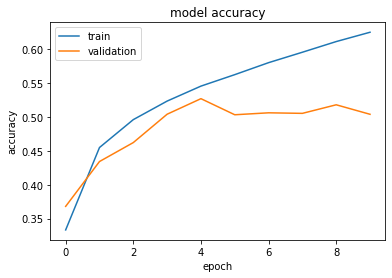

In [26]:
# plot model accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

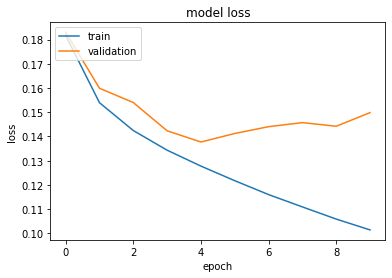

In [27]:
# plot model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Result.

From the plot it is found that the train error keeps decreasing as the epoch count is increased howenver the test error slightly oscilates and reaches mini at epoch 4 and again rises.
Model perform good with train set (overfitting) and performs moderate with test set. 